### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

# Note to grader/viewer

Inline comments have been inserted to describe the purpose of the gropups of python code. Most of the comments have been copied from the instructions given to clarify what each section does. Where the purpose is obvious, I rely on the instructor provided notes.



In [1]:
# Dependencies and Setup
import pandas as pd

# PyMoli dat file for analysis
PyMoli_data = ("Resources/purchase_data.csv")

# Read Purchasing File and store into Pandas data frame
PyMoli_df = pd.read_csv(PyMoli_data)

# View Header
PyMoli_df.head()


Purchase ID             SN  Age Gender  Item ID  \
0            0        Lisim78   20   Male      108   
1            1    Lisovynya38   40   Male      143   
2            2     Ithergue48   24   Male       92   
3            3  Chamassasya86   24   Male      100   
4            4      Iskosia90   23   Male      131   

                                   Item Name  Price  
0  Extraction, Quickblade Of Trembling Hands   3.53  
1                          Frenzied Scimitar   1.56  
2                               Final Critic   4.88  
3                                Blindscythe   3.27  
4                                       Fury   1.44

## Player Count

* Display the total number of players


In [2]:
player_count = PyMoli_df['SN'].nunique()

player_count_df = pd.DataFrame( {'Total Players':[player_count]})


from IPython.display import HTML

styles = [
    dict(selector="td", props=[("font-size", "110%"),
                               ("text-align", "center")]),
    dict(selector="th", props=[("font-size", "125%"),
                               ("text-align", "left")]),
]
html = player_count_df.style.set_table_styles(styles)
html




## Purchasing Analysis (Total)

* Run basic calculations to obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


In [3]:
#Purchasing Analysis - Run basic calculations to obtain number of unique items, average price, etc.
unique_items = PyMoli_df['Item Name'].nunique()
average_price =PyMoli_df['Price'].mean()
quantity_purchases = PyMoli_df['Purchase ID'].count()
total_revenue =PyMoli_df['Price'].sum()

#Create a summary data frame to hold the results
dataDict = {'Total Unique Items':[unique_items],'Average Price':[average_price],'Quantity of Purchases':[quantity_purchases],'Total Revenue':[total_revenue]}
purchasing_analysis_df = pd.DataFrame(dataDict)

#Improve readability with currency formating
purchasing_analysis_df['Average Price'] = purchasing_analysis_df['Average Price'].map("${:.2f}".format)
purchasing_analysis_df['Total Revenue'] = purchasing_analysis_df['Total Revenue'].map("${:.2f}".format)

#Display the summary data frame
from IPython.display import HTML

styles = [
    dict(selector="td", props=[("font-size", "110%"),
                               ("text-align", "center")])
]
html = purchasing_analysis_df.style.set_table_styles(styles)
html    

## Gender Demographics

dataFrame.drop_duplicates(subset=None, keep=’first’, inplace=False)
* Percentage and Count of Male Players
* Percentage and Count of Female Players
* Percentage and Count of Other / Non-Disclosed




In [4]:
#Get a dataframe of just names and genders 
SN_Gender_df= PyMoli_df[["SN","Gender"]]    
SN_Gender_unique_df = SN_Gender_df.drop_duplicates(subset=None, keep='first', inplace=False)

#Get groupby object to creae dataframe
gender_df = SN_Gender_unique_df.groupby('Gender')


#create output dataframe - divide by player_count - Total Count  & Percentage of Players
gender_demo_df = gender_df.count()
percentage_of_players = gender_demo_df["SN"]*100/player_count
gender_demo_df["Percentage of Players"] = percentage_of_players
gender_demo_df["Percentage of Players"] = gender_demo_df["Percentage of Players"].map("{:.2f}%".format)
gender_demo_df = gender_demo_df.sort_values('SN',ascending = False)
gender_demo_df.rename(columns = {"SN" : "Total Count"}, inplace = True)

from IPython.display import HTML

styles = [
    dict(selector="td", props=[("font-size", "110%"),
                               ("text-align", "center")]),
    dict(selector="th", props=[("font-size", "120%"),
                               ("text-align", "left")]),
]
html = gender_demo_df.style.set_table_styles(styles)
html



## Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [5]:
#Purchasing Analysis by Gender

#Purchase Count by gender
purchase_analysis_df = PyMoli_df.groupby('Gender')
purchases_by_gender =  purchase_analysis_df['Purchase ID'].count()

# Average Purchase Price by gender
average_purchase_price_by_gender = purchase_analysis_df['Price'].mean()

#Total Purchase Value by gender
total_revenues_by_gender = purchase_analysis_df['Price'].sum()

# Avg Total Purchase per Person by gender
average_purchase_total_by_gender = total_revenues_by_gender/gender_demo_df['Total Count']

#Create a summary data frame to hold the results
purchasing_analysis_by_gender_df = pd.concat([purchases_by_gender,average_purchase_price_by_gender],axis=1)
purchasing_analysis_by_gender_df = pd.concat([purchasing_analysis_by_gender_df,total_revenues_by_gender],axis=1)
purchasing_analysis_by_gender_df = pd.concat([purchasing_analysis_by_gender_df,average_purchase_total_by_gender],axis=1)
new_cols=['Purchase Count','Average Purchase Price','Total Purchase Value','Avg Total Purchase per Person']
purchasing_analysis_by_gender_df.columns=new_cols
purchasing_analysis_by_gender_df = purchasing_analysis_by_gender_df.sort_values('Purchase Count',ascending = False)

#Improve readability with currency formating
purchasing_analysis_by_gender_df['Average Purchase Price'] = purchasing_analysis_by_gender_df['Average Purchase Price'].map("${:.2f}".format)
purchasing_analysis_by_gender_df['Total Purchase Value'] = purchasing_analysis_by_gender_df['Total Purchase Value'].map("${:.2f}".format)
purchasing_analysis_by_gender_df['Avg Total Purchase per Person'] = purchasing_analysis_by_gender_df['Avg Total Purchase per Person'].map("${:.2f}".format)

#Display the summary data frame
from IPython.display import HTML

styles = [
    dict(selector="td", props=[("font-size", "100%"),
                               ("text-align", "center")]),
    dict(selector="th", props=[("font-size", "110%"),
                               ("text-align", "left")]),
]
html = purchasing_analysis_by_gender_df.style.set_table_styles(styles)
html


## Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


In [6]:
#Age Demographics

# Establish bins for ages
bins = [0,9.99,14.99,19.99,24.99,29.99,34.99,39.99,120]
age_group = ["<10",'10-14','15-19','20-24','25-29','30-34','35-39','40+']

#set up dataframe with name; age
ages_df = PyMoli_df[["SN","Age"]] 
ages_df =ages_df.drop_duplicates(subset=None, keep='first', inplace=False)


# # Categorize the existing players using the age bins. Hint: use pd.cut()
ages_df["Age Group"] = pd.cut(ages_df["Age"], bins, labels=age_group, include_lowest=False)
ages_df 

# Calculate the numbers and percentages by age group
ages_df = ages_df.groupby("Age Group")
ages_bins_df = ages_df.count()
ages_bins_df

# Create a summary data frame to hold the results
age_demographics_df = ages_bins_df[["Age"]]
age_demographics_pct_df = age_demographics_df*100/player_count
age_demographics_df = pd.concat([age_demographics_df,age_demographics_pct_df],axis=1)
age_demographics_df
age_demo_cols=['Total Count','Percentage of Players']
age_demographics_df.columns=age_demo_cols


# Optional: round the percentage column to two decimal points
age_demographics_df["Percentage of Players"] = age_demographics_df["Percentage of Players"].map("{:.2f}%".format)

# Display Age Demographics Table

from IPython.display import HTML

styles = [
    dict(selector="td", props=[("font-size", "100%"),
                               ("text-align", "center")]),
    dict(selector="th", props=[("font-size", "110%"),
                               ("text-align", "center")]),
]
html = age_demographics_df.style.set_table_styles(styles)
html

## Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

In [7]:
#Purchasing Analysis (Age)

# Bin the purchase_data data frame by age
ages2_df = PyMoli_df[["Age","Purchase ID","Price","SN"]] 

#Create new dataframe to avoid "A value is trying to be set on a copy of a slice from a DataFrame" error
purchases_by_age_group_df = ages2_df[["Age","Purchase ID","Price"]] 
purchases_by_age_group_df["Age Group"] = pd.cut(purchases_by_age_group_df["Age"], bins, labels=age_group, include_lowest=False)


# Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below
#Purchase Count by age group
purchase_analysis_by_age_df = purchases_by_age_group_df.groupby('Age Group')
purchases_by_age_group = purchase_analysis_by_age_df['Purchase ID'].count()

# Average Purchase Price by age group
average_purchase_price_by_age_group = purchase_analysis_by_age_df['Price'].mean()

#Total Purchase Value by gender
total_revenues_by_age_group = purchase_analysis_by_age_df['Price'].sum()

# Avg Total Purchase per Person by gender
average_purchase_total_by_age_group = total_revenues_by_age_group/age_demographics_df['Total Count']

# Create a summary data frame to hold the results
age_group_df = pd.concat([purchases_by_age_group,average_purchase_price_by_age_group],axis=1)
age_group_df = pd.concat([age_group_df,total_revenues_by_age_group],axis=1)
age_group_df = pd.concat([age_group_df,average_purchase_total_by_age_group],axis=1)
age_cols=['Purchase Count','Average Purchase Price','Total Purchase Value','Avg Total Purchase per Person']
age_group_df.columns=age_cols

                                                                                      
# Optional: give the displayed data cleaner formatting
age_group_df['Average Purchase Price'] = age_group_df['Average Purchase Price'].map("${:.2f}".format)
age_group_df['Total Purchase Value'] = age_group_df['Total Purchase Value'].map("${:.2f}".format)
age_group_df['Avg Total Purchase per Person'] = age_group_df['Avg Total Purchase per Person'].map("${:.2f}".format)

                                                                                      
# Display the summary data frame
from IPython.display import HTML

styles = [
    dict(selector="td", props=[("font-size", "100%"),
                               ("text-align", "center")]),
    dict(selector="th", props=[("font-size", "110%"),
                               ("text-align", "left")]),
]
html = age_group_df.style.set_table_styles(styles)
html

## Top Spenders

- Run basic calculations to obtain the results in the table below
- Create a summary data frame to hold the results
- Sort the total purchase value column in descending order
- Optional: give the displayed data cleaner formatting
- Display a preview of the summary data frame

In [ ]:
## Top Spenders

# Run basic calculations to obtain the results in the table below 
names_df = PyMoli_df[["SN","Purchase ID","Price"]] 
names_group_dfo = names_df.groupby("SN")

# SN -Purchase Count	Average Purchase Price	Total Purchase Value
purchase_count_by_name_df = names_group_dfo['Purchase ID'].count()
avg_purchase_price_by_name_df = names_group_dfo['Price'].mean()
total_purchase_value_by_name_df = names_group_dfo['Price'].sum()

# Create a summary data frame to hold the results
top_spender_df = pd.concat([purchase_count_by_name_df,avg_purchase_price_by_name_df],axis=1)
top_spender_df = pd.concat([top_spender_df,total_purchase_value_by_name_df],axis=1)
spend_cols = ['Purchase Count', 'Average Purchase Price','Total Purchase Value']
top_spender_df.columns = spend_cols

# Sort the total purchase value column in descending order
top_spender_df = top_spender_df.sort_values(['Total Purchase Value'],ascending = False)

# Optional: give the displayed data cleaner formatting
top_spender_df['Average Purchase Price'] = top_spender_df['Average Purchase Price'].map("${:.2f}".format)
top_spender_df['Total Purchase Value'] = top_spender_df['Total Purchase Value'].map("${:.2f}".format)
top_spender_df

# Display a preview of the summary data frame  
top_spender_df.head()


## Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



In [ ]:
# Most Popular Items

# Retrieve the Item ID, Item Name, and Item Price columns
most_pop_df = PyMoli_df[["Item ID","Item Name","Price"]]

# Group by Item ID and Item Name. Perform calculations to obtain purchase count, average item price, and total purchase value
most_pop_dfo = most_pop_df.groupby(["Item ID","Item Name"])
purchase_count = most_pop_dfo["Item ID"].count()
average_price = most_pop_dfo["Price"].mean()
total_purchase_value = most_pop_dfo["Price"].sum()
total_purchase_value

# Create a summary data frame to hold the results
most_popular_df = pd.concat([purchase_count,average_price],axis = 1)
most_popular_df = pd.concat([most_popular_df,total_purchase_value],axis = 1)
most_popular_cols = ['Purchase Count','Item Price','Total Purchase Value']
most_popular_df.columns = most_popular_cols

# Sort the purchase count column in descending order - 'Purchase Count','Item Price','Total Purchase Value'
most_popular_df = most_popular_df.sort_values(['Purchase Count'], ascending = False)


# Optional: give the displayed data cleaner formatting
most_popular_df2 = most_popular_df
most_popular_df2['Item Price'] = most_popular_df2['Item Price'].map("${:.2f}".format)
most_popular_df2['Total Purchase Value'] = most_popular_df2['Total Purchase Value'].map("${:.2f}".format)

# Display a preview of the summary data frame
most_popular_df2.head()

## Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



In [ ]:
# Sort the above table by total purchase value in descending order
most_popular_df = most_popular_df.sort_values(['Total Purchase Value'], ascending = False)

# Optional: give the displayed data cleaner formatting
most_popular_display = most_popular_df
most_popular_display['Item Price'] = most_popular_display['Item Price'].map("${:.2f}".format)
most_popular_display['Total Purchase Value'] = most_popular_display['Total Purchase Value'].map("${:.2f}".format)

# Display a preview of the data frame
most_popular_display.head()

# Summary Findings Report:

## Who loves our games?

#### 20-24 year olds

The data shows that 20-24 year olds are most likely to play our games at 44.79%. The next lagest block of players are the 15-19 year olds at 18.58% and 25-29 at 13.37%. Gamers worldwide are less skewed with 38% total across 18-34 year olds. [Gamers](https://www.statista.com/statistics/189582/age-of-us-video-game-players-since-2010/)

PyMoli would do well to understand why the difference is so pronounced. Has marketing been directed at the 20-24 year olds at the expense of other future players? Marketing camapaigns should expand their focus so we can tap into the larger market.

#### Males

The skewed results don't end with age statistics. The proportion of males gamers for PyMoli games is unusually high at 84% while greater marketing suggests 55-59% of gaamers are males.  [Gamers by Gender](https://www.statista.com/statistics/232383/gender-split-of-us-computer-and-video-gamers/).  Future growth endeavors should investigate why we are performing below average with female gamers. This is especially in light of the fact female gamers spend almost 10% more on average than male gamers; $4.47 vs. $4.07.

## Who are the top spenders?

#### 20-24 year olds in total & 35-39 for average purchases

It makes sense that out larest player group also purchases the most product. However; their average purchase price at \\$4.32 is not as high as the 35-39 age group at  \\$4.76 or the <10 at \\$4.54. Which may be because the <10 players are subsidized by their parents, who may be in the 35-39 age group. 
We should continue to promote to the <10 set because they can become gamers for life. If we can attract them now we may be able to continue to have income streams since we can do in-game marketing for future promotions.

#### Gender differences in purchasing

Purchasing volume by gender is proportional to the quantity of player: Males - 84 pct and females 14 pct with undisclosed the remaining 2 pct. However females spent 10 pct more on average purchase price than males \\$4.47 vs \\$4.07  but our undisclosed gender gamers had the highest at \\$4.56.  PyMoli needs to continue to market to all genders to grow the business.


## Favorite games!

Now the pièce de résistance!  PyMoli best seller is *Final Critic*. Our third most profitable game *Nirvana* has much promise as well since it only sold 4 fewer than *Final Critic* even though it is higher cost item; **so let's market Nirvana to our players!**  
*Oathbreaker, Last Hope of the Breaking Storm* also does well taking the number 2 spot fo most popular and most profitable.

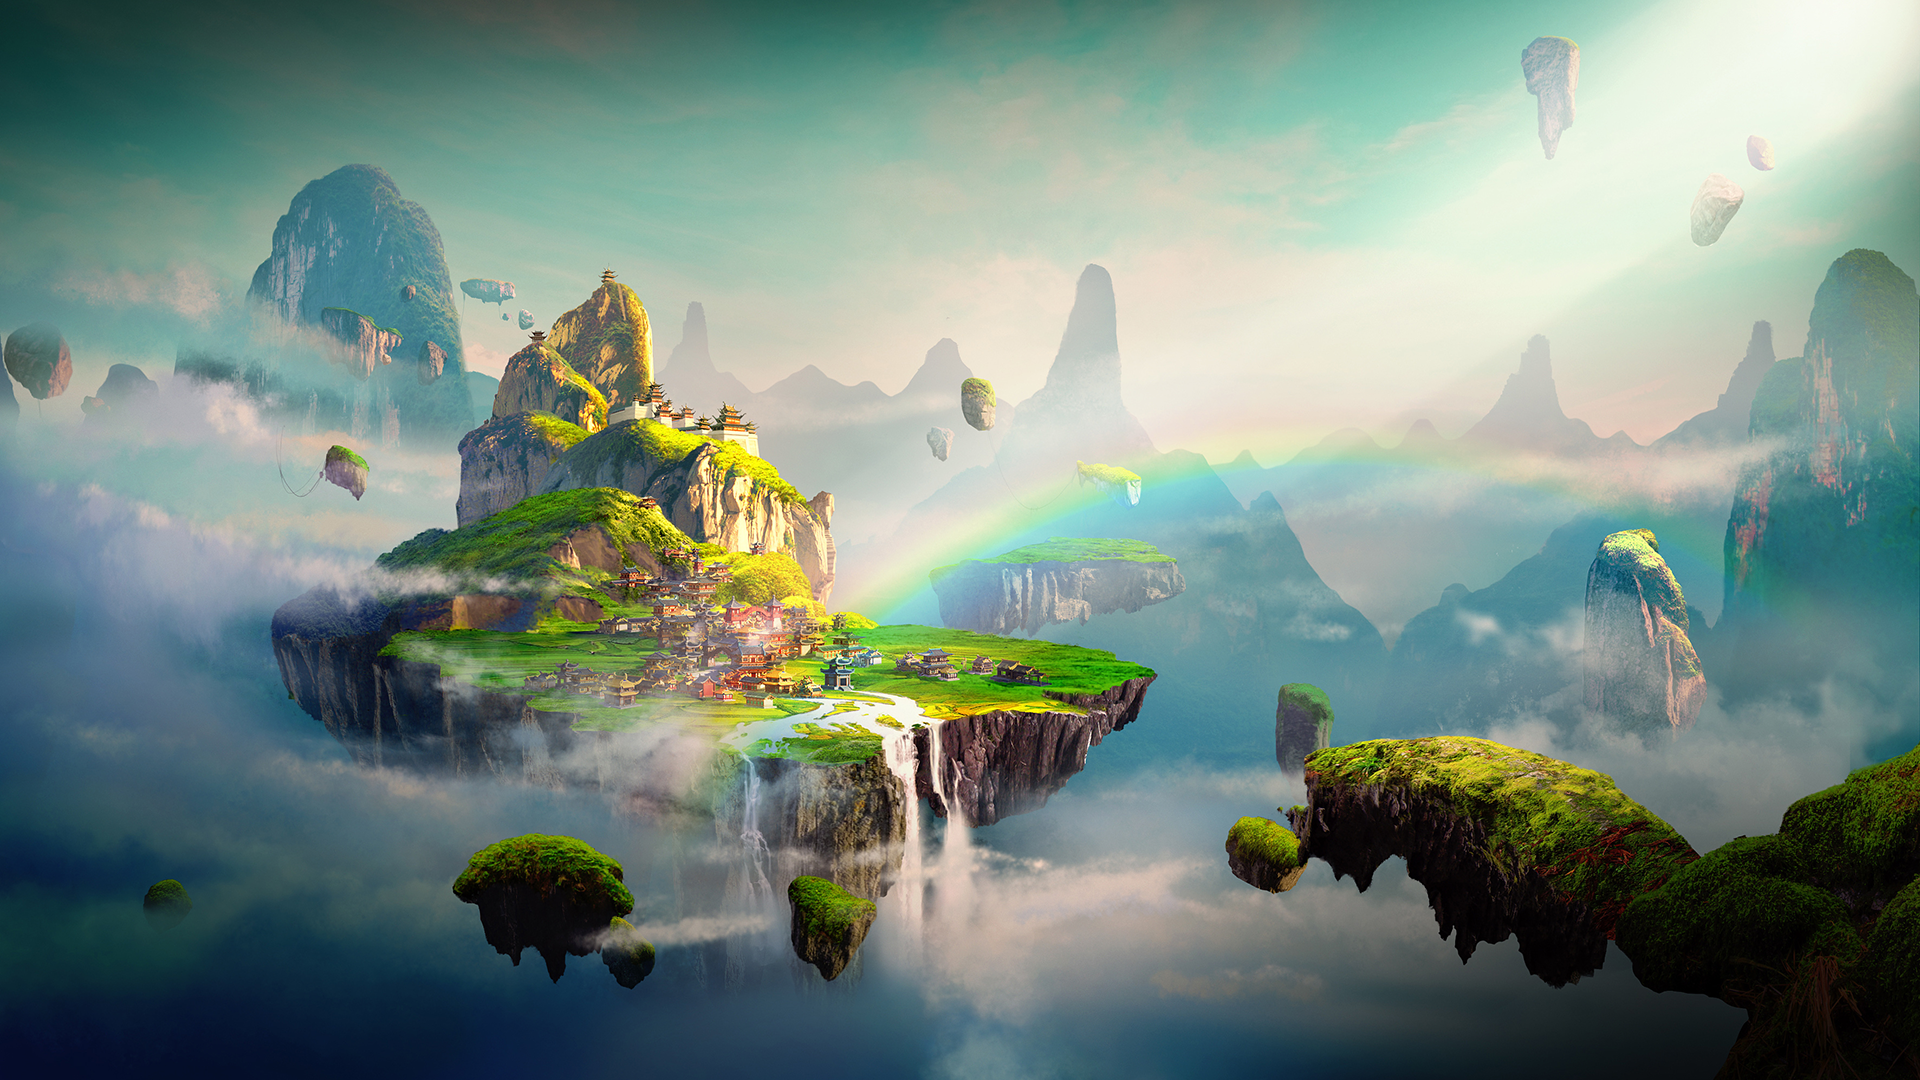

# Have a great day!